<a href="https://colab.research.google.com/github/sylvioneto/python_datascience_movies/blob/master/tmdb_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# environment setup
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
import pandas as pd

0.9.0


In [2]:
# read the file and show first records
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [3]:
# unique movie languages
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [4]:
# how many movies in each language
print("show as serie")
tmdb["original_language"].value_counts()

show as serie


en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ro       2
ta       2
ar       2
id       2
cs       2
tr       1
ps       1
nb       1
af       1
vi       1
hu       1
el       1
no       1
pl       1
sl       1
xx       1
te       1
ky       1
is       1
Name: original_language, dtype: int64

In [5]:
# tranform serie to data frame
df_lang_count = tmdb["original_language"].value_counts().to_frame().reset_index()
df_lang_count.columns = ["language", "total"]
df_lang_count

,language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


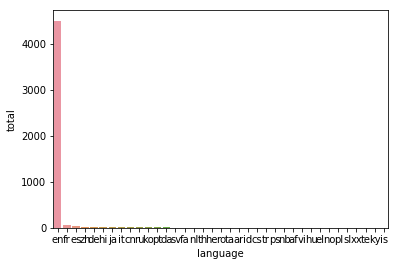

In [6]:
# Plot categories using barplot
import seaborn as sns

sns.barplot(x = "language", y = "total", data = df_lang_count)

In [0]:
# Plot categories using catplot
sns.catplot(x = "original_language", kind="count", data = tmdb)

In [0]:
# plot in a pie chat
import matplotlib.pyplot as plt
plt.pie(df_lang_count["total"], labels = df_lang_count["language"])

In [0]:
# grouping minor amounts

# count and sum total movies
total = tmdb["original_language"].value_counts().sum()

# count and get only english
total_english = tmdb["original_language"].value_counts().loc["en"]

# print values
print("Total movies in English is {} and Others is {}".format(total_english, total - total_english))

# create a dictionary to store the values
total_data_dic = {
    'language' : ['english', 'others'],
    'total' : [total_english,  total - total_english]
}
total_data_frame = pd.DataFrame(total_data_dic)

# plot in a bar chart
sns.barplot(data = total_data_frame, x = total_data_frame["language"], y = total_data_frame["total"])

In [0]:
# plot in a pie chart
plt.pie(total_data_frame["total"], labels = total_data_frame["language"])

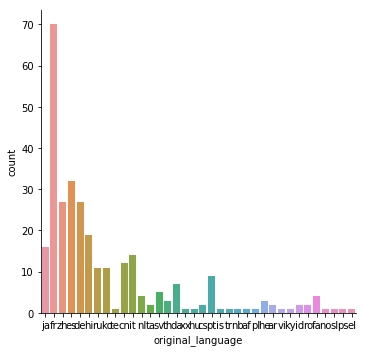

In [0]:
# query non english movies
non_english_movies = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = non_english_movies)

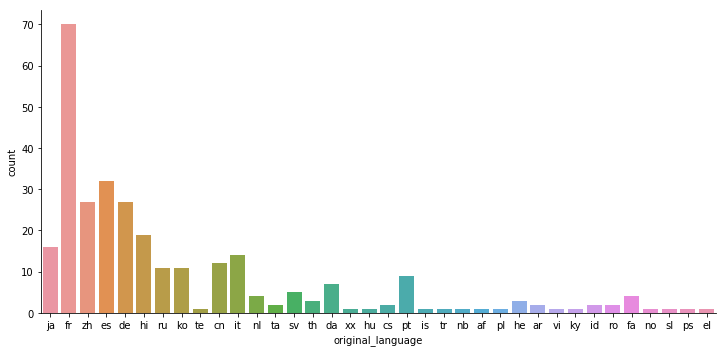

In [0]:
# change aspect to make it less square
sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2)

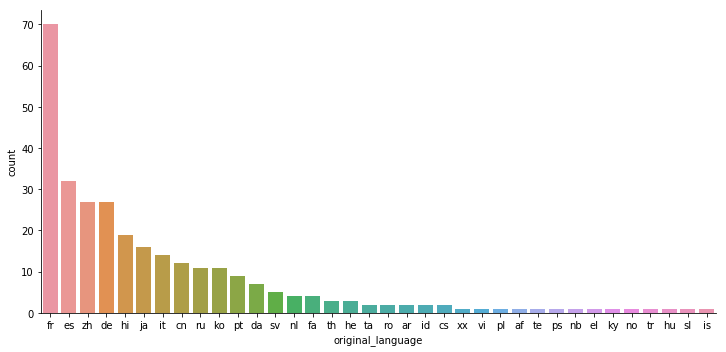

In [0]:
# order higher to lower
non_english_ordered = non_english_movies.original_language.value_counts()

sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2,
            order = non_english_count.index)

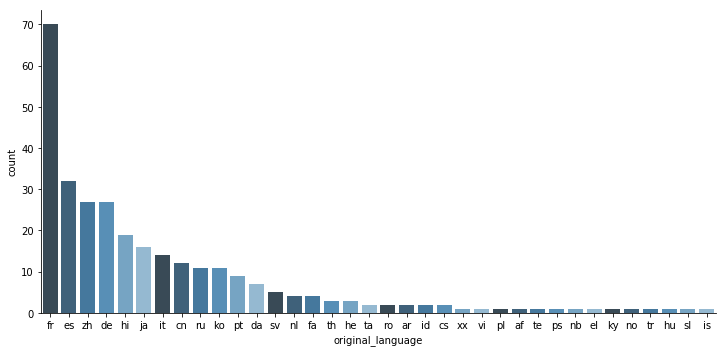

In [0]:
# using a palette of colours
sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2,
            palette=sns.color_palette("Blues_d"),
            order = non_english_count.index)